# Pre-amble

In [41]:
# loading the required packages
import pandas as pd
import numpy as np
import datetime
import random
import re
import os
import plotnine
from plotnine import *

# for repeated printouts 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to custom displays of row-column df printouts
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data import and basic dataset information

Here, we'll load our analysis-ready sentencing data, and print out some of the basic information about the data:

In [2]:
# loading the analysis-ready dataset
sentencing_analysis = pd.read_csv('../data/csv/sentencing_analysis.csv')

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_14268\2683187563.py:2: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.


In [3]:
# printing out basic dataset info
sentencing_analysis.dtypes

CASE_ID                                  int64
CASE_PARTICIPANT_ID                      int64
RECEIVED_DATE                           object
OFFENSE_CATEGORY                        object
PRIMARY_CHARGE_FLAG                       bool
CHARGE_ID                                int64
CHARGE_VERSION_ID                        int64
DISPOSITION_CHARGED_OFFENSE_TITLE_x     object
CHARGE_COUNT                             int64
DISPOSITION_DATE                        object
DISPOSITION_CHARGED_CHAPTER             object
DISPOSITION_CHARGED_ACT                 object
DISPOSITION_CHARGED_SECTION             object
DISPOSITION_CHARGED_CLASS               object
DISPOSITION_CHARGED_AOIC                object
CHARGE_DISPOSITION                      object
CHARGE_DISPOSITION_REASON               object
SENTENCE_JUDGE                          object
SENTENCE_COURT_NAME                     object
SENTENCE_COURT_FACILITY                 object
SENTENCE_PHASE                          object
SENTENCE_DATE

In [4]:
# printing a sample of the dataset
sentencing_analysis.sample(n=10)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE_x,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_black,is_hisp,is_white,is_female,age_cleaned,sentence_date,sentence_year,sentence_month,sentence_day,sentence_ym,sa_office_period,sa_timedelta,sa_timedelta_days,BRA_period,BRA_timedelta,BRA_timedelta_days,sentencing_num,sentencing_term_d,sentencing_term_y,is_incarcerated,is_on_probation,regrouped_offense,eligible_offense,DISPOSITION_CHARGED_OFFENSE_TITLE_y,uccs_code,probability,mfj_code,ncrp_code,ncic_code,nibrs_code,charge_desc,offense_category_code,offense_category_desc,offense_type_code,offense_type_desc
180536,588002166686,441394045073,11/24/2020 12:00:00 AM,Failure to Register as a Sex Offender,True,10972632634978,1141555876257,VIOLATION OF THE MURDERER AND VIOLENT OFFENDER...,1,02/22/2022 12:00:00 AM,730,154,10(a),3,14233,Plea Of Guilty,NaN,Joanne Rosado,District 1 - Chicago,26TH Street,Original Sentencing,02/22/2022 12:00:00 AM,Prison,True,Illinois Department of Corrections,2.0,Year(s),427.0,46.0,Black,Male,Chicago,11/23/2020 12:00:00 AM,NaN,CHICAGO PD,NaN,11/23/2020 10:20:00 PM,11/24/2020 12:00:00 AM,Approved,12/22/2020 12:00:00 AM,Failure to Register as a Sex Offender,True,False,False,0.0,46.0,2022-02-22,2022,2,22,2022-02,True,62,1909,True,56,1716,2.0,730.0,2.000000,True,False,Failure to Register as a Sex Offender,False,VIOLATION OF THE MURDERER AND VIOLENT OFFENDER...,5080,0.965001,400,530,5001;5002;5003;5004;5005;5006;5007;5008;5009;5...,500,Contempt of Court/Violate Court Order,69,Contempt of court,5,Public Order
142671,562871657999,411706173423,06/28/2017 12:00:00 AM,Aggravated DUI,True,10199862134206,1035039051257,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,1,09/20/2017 12:00:00 AM,625,5,11-501(a),4,0014717,Plea Of Guilty,NaN,Richard E Schwind,District 3 - Rolling Meadows,Rolling Meadows Courthouse,Original Sentencing,09/20/2017 12:00:00 AM,Prison,True,Illinois Department of Corrections,1.0,Year(s),36.0,27.0,White,Male,Streamwood,06/28/2017 12:00:00 AM,NaN,STREAMWOOD PD,NaN,06/28/2017 12:39:00 AM,06/28/2017 12:00:00 AM,Approved,08/15/2017 12:00:00 AM,Aggravated DUI,False,False,True,0.0,27.0,2017-09-20,2017,9,20,2017-09,True,9,293,True,3,100,1.0,365.0,1.000000,True,False,DUI,True,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,4020,0.999360,350,565,5404,NaN,Driving Under the Influence of Alcohol,60,Driving Under the Influence,4,DUI Offense
122117,552935861869,399852886732,03/02/2016 12:00:00 AM,Aggravated DUI,True,9846505713239,998499445871,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,1,03/01/2017 12:00:00 AM,625,5,11-501(a),4,0014717,Plea Of Guilty,NaN,Carol M Howard,District 1 - Chicago,26TH Street,Original Sentencing,03/01/2017 12:00:00 AM,Probation,True,Probation,2.0,Year(s),NaN,34.0,Black,Male,Chicago,03/02/2016 12:00:00 AM,NaN,CHICAGO PD,District 3 - Grand Crossing,03/02/2016 01:04:00 AM,03/02/2016 12:00:00 AM,Approved,NaN,Aggravated DUI,True,False,False,0.0,34.0,2017-03-01,2017,3,1,2017-03,True,3,90,False,-3,-103,2.0,730.0,2.000000,False,True,DUI,True,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,4020,0.999360,350,565,5404,NaN,Driving Under the Influence of Alcohol,60,Driving Under the Influence,4,DUI Offense
4926,319983090205,105260583279,03/12/2010 12:00:00 AM,PROMIS Conversion,True,8207288853373,829966178319,FAIL TO REPORT ACCIDENT/DEAT

In [5]:
# what's the shape of the data? 
print("Data shape: " + str(sentencing_analysis.shape))

Data shape: (186824, 76)


# Research questions:

Here, we aim to provide some preliminary tabulations on the following questions:

1. Does State Attorney Kim Foxx's entry lead to any changes in black-white incarceration probability?
2. Does State Attorney Kim Foxx's entry lead to any changes in black-white probability of probation?
3. Does State Attorney Kim Foxx's entry lead to any changes in black-white sentencing time?

# Preliminary graphs

In [29]:
# filter for only white/black 
sentencing_bw = sentencing_analysis[(sentencing_analysis.is_black == True) | (sentencing_analysis.is_white == True)].copy()

## Incarceration gaps

## Probation gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


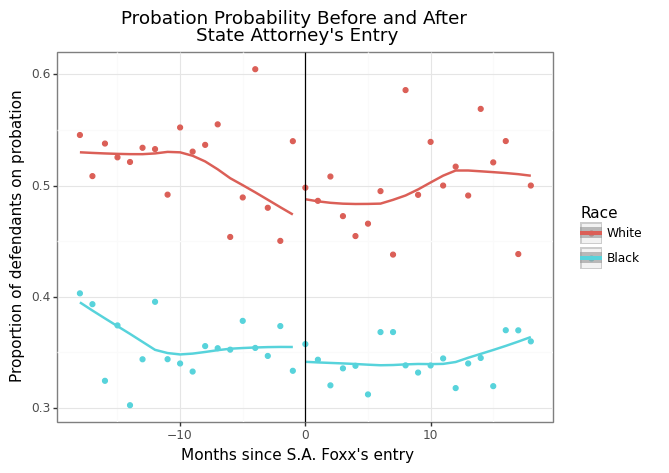

<ggplot: (145182345253)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [89]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -18) & 
                                              (sentencing_bw_summary.sa_timedelta <= 18)].copy()

# creating a time trend graph, by race
probation_gap_bw = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion of defendants on probation", 
         title = "Probation Probability Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw

# exporting the plot
probation_gap_bw.save("../output/probation_gap_bw.png", width = 5, height = 5, dpi = 100)

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


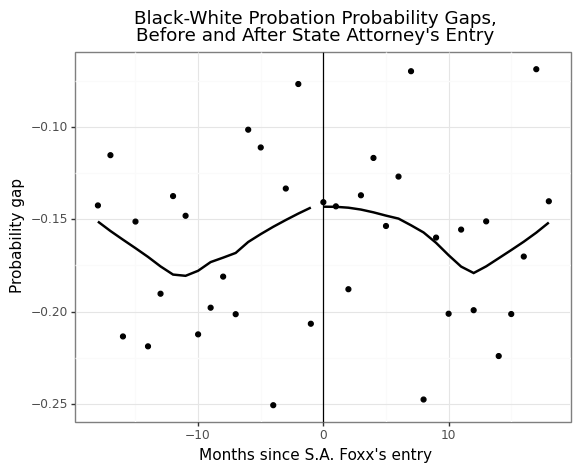

<ggplot: (145182508807)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw2.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [88]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -18) & 
                                              (sentencing_bw_summary.sa_timedelta <= 18)].copy()

# preparing the wide data
sentencing_bw_summary = pd.pivot(sentencing_bw_summary, index=['sa_timedelta'], columns='is_black', values = ['prop', 'n']).reset_index()
new_names = ['sa_timedelta', 'prop_white', 'prop_black', 'n_white', 'n_black']
sentencing_bw_summary.columns = new_names
sentencing_bw_summary['prop_bw_gap'] = sentencing_bw_summary['prop_black'] - sentencing_bw_summary['prop_white'] 

# plotting
probation_gap_bw2 = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop_bw_gap')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Probability gap", 
         title = "Black-White Probation Probability Gaps,\nBefore and After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw2

# exporting the plot
probation_gap_bw2.save("../output/probation_gap_bw2.png", width = 5, height = 5, dpi = 100)

## Sentencing time

In [97]:
sentencing_analysis.DISPOSITION_CHARGED_OFFENSE_TITLE_x.sample(n=10)

109678                          DUI ALC/INTOX COMPOUND/DRUG
36872                                    AGGRAVATED BATTERY
169837                 POSSESSION OF A CONTROLLED SUBSTANCE
6051                              DRVG UNDER INFLU/BAC 0.08
69922                  POSSESSION OF A CONTROLLED SUBSTANCE
69098                                              BURGLARY
33688     ESCAPE; FAILURE TO COMPLY WITH A CONDITION OF ...
23573     AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL
30428                  POSSESSION OF A CONTROLLED SUBSTANCE
6767                   POSSESSION OF A CONTROLLED SUBSTANCE
Name: DISPOSITION_CHARGED_OFFENSE_TITLE_x, dtype: object